# Diversifying Parameters in Reinforcement Learning (Distributional RL)

Change the objects/functions as needed, here and in the `drl.py` file! See examples, below. 

In [15]:
# Re-run this cell between every run of an `sim.ipynb`, if you make updates to the `drl.py` file!
import drl
import torch
import importlib

importlib.reload(drl)
torch.manual_seed(0)

<h1>Trial Parameters</h1>
<p>Below, we encode sample task parameters. These parameters are utilized in the `init` and `sim` functions for simulation - check `drl.py` and documentation in `drl.md` for how to use this in specifying new task contingencies.</p>

In [9]:
# Initialize experiment set-up (time intervals, rewards, etc.)

n_trials = 200 # number of trials
t_int = 7 # length of trial
dt = 0.1 # timestep size (of tensor in simulation)
tsk = "hyp_unif" # to specify reward schedules, CHECK drl.py `init` to add more tasks, reward schedules 

types = 1 # types of trials
t_stim = torch.tensor([2]) # time of stimulus
t_rew = torch.tensor([6]) # time of reward
s_rew = torch.tensor([1]) # size of reward
n_predictors = 20  # number of value predictors
 
# Advanced Parameters
unc = 0 #time uncertainty factor

T, x, r = drl.init(tsk = tsk,
                   n_trials = n_trials, 
                   t_int = t_int, 
                   delta = dt, 
                   types = types,
                   t_stim = t_stim,
                   t_rew = t_rew,
                   s_rew = s_rew,
                   uncertainty = unc)

<h1>Simulations</h1>

In [10]:
# (3) Simulate experiment with given learning parameters
exp = drl.sim(T, x, r, 
                tsk = tsk,
                num_predictors = n_predictors,
                # Can diversify UP TO TWO PARAMETERS (alpha, gamma, or lambda) for all value predictors in experiment
                a = (0.3, 0.8), # Tuple specifies range of values (alpha scaling factors will be uniformly random between 0.3 and 0.8)
                g = [0.3,0.6,0.8], # List specifies discrete values (gamma will be 0.3, 0.6, or 0.8)
                l = 0.2) # Float specifies single value across all value predictors (lambda will be 0.2 for all value predictors)

# Other examples of `sim` calls:
# No diversification: all predictors have alpha scaling factor = 0.2, gamma = 0.8, lambda = 0.2
# exp = drl.sim(T, x, r, 
#                 tsk = tsk,
#                 num_predictors = n_predictors,
#                 a = 0.2,
#                 g = 0.8, 
#                 l = 0.2)

# 1 parameter, discrete: alpha scaling factor will be 0.2, gamma will be 0.8, 
# lambda will be 0.2, 0.4, 0.6 (randomly chosen for each predictor)
# exp = drl.sim(T, x, r, 
#                 tsk = tsk,
#                 num_predictors = n_predictors,
#                 a = 0.2,
#                 g = 0.8, 
#                 l = [0.2, 0.4, 0.6])


# 2 parameters, range and discrete: alpha will be 0.2, gamma will be randomly chosen between 0.2 and 0.4, 
# lambda will be 0.1, 0.245, 0.55, 0.9 (randomly chosen for each predictor)
# exp = drl.sim(T, x, r, 
#                 tsk = tsk,
#                 num_predictors = n_predictors,
#                 a = 0.2,
#                 g = (0.2,0.4),
#                 l = [0.1, 0.245, 0.55, 0.9])


# 2 parameters, both discrete: alpha will be 0.1, 0.245, 0.55, 0.9 (randomly chosen for each predictor), 
# gamma will be 0.8, lambda will be 0.1, 0.245, 0.55, 0.9 (randomly chosen for each predictor)
# exp = drl.sim(T, x, r, 
#                 tsk = tsk,
#                 num_predictors = n_predictors,
#                 a = [0.1, 0.245, 0.55, 0.9],
#                 g = 0.8, 
#                 l = [0.1, 0.245, 0.55, 0.9])



<h2>Visualizations</h2>

[0.3, 0.6, 0.8]


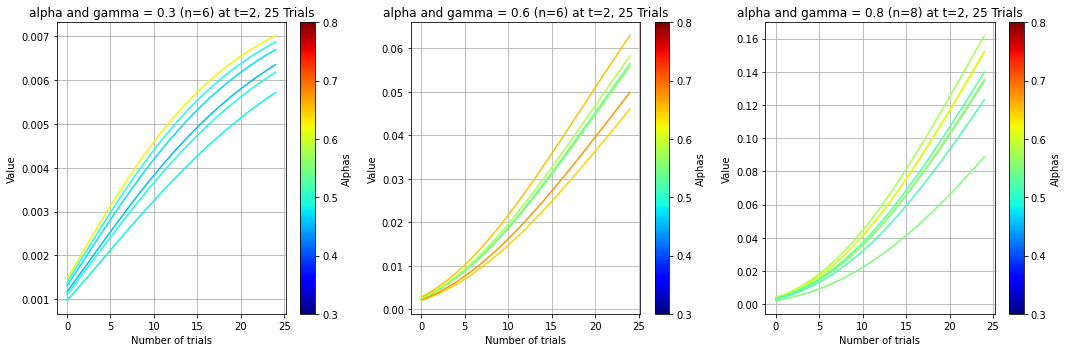

In [14]:
# Value of time of cue (t = 2)
drl.val_at_t(exp, state = 0, 
             time = 2,
             # 1st parameter (and range) inputted: mapped to heatmap
             # 2nd parameter (MUST BE DISCRETE): Divides into n plots (e.g. 3 values -> 3 plots)
             diversify = ["alpha", (0.3,0.8), "gamma", [0.3,0.6,0.8]])

# Further calls of 'val_at_t'
# drl.val_at_t(exp, state = 0, 
#              time = 2,
#              # OPTIONAL PARAMETERS (trials, fname)
#              diversify = ["alpha", (0.3,0.8), "gamma", [0.3,0.6,0.8]],
#              trials = [5,30], # trials - range of trials to graph 
#              fname = "test") # fname - name of file to graph

In [ ]:
# Produce heatmap of TD error across trials and time steps for each value predictor
drl.heatmap(exp, state = 0, 
            prs = range(4,6), 
            diversify=["alpha", "gamma"],
            fname="test")

In [ ]:
# Animation of value over trials for all predictors (at all time steps)
# NOTE: This takes a long time to run if there are many trials and time steps (5 minutes if we ran for all 200 trials)
drl.val_over_t(exp, st = 0, stp = 0.5,
                    fname = "test",
                    # Same usage as 'val_at_t'
                    diversify = ["alpha", (0.3,0.8), "gamma", [0.3,0.6,0.8]],
                    # Optional parameter: trials - range of trials to animate 
                    trials=[5,15]) 

<h2>MORE EXAMPLES: Simulating the Variable Reward Task and Delay Reward Task (Uchida Lab)</h2>

<h3>Variable Reward Task</h3>

In [16]:
n_trials = 200 # number of trials
t_int = 7 # length of trial
dt = 0.1 # timestep size
tsk = "var" # to specify reward schedules

types = 1 # types of trials
t_stim = torch.full((types,), 2) # time of stimulus
t_rew = torch.full((types,), 6) # time of reward
s_rew = torch.tensor([[0.1, 0.06612594], [0.3, 0.09090909], [1.2, 0.14847358], [2.5, 0.15489467], [5, 0.31159175], [10, 0.150519], [20, 0.07705306]])
n_predictors = 25  # number of value predictors
 
# Advanced Parameters
unc = 0 #uncertainty factor

T, x, r = drl.init(tsk = tsk,
                   n_trials = n_trials, 
                   t_int = t_int, 
                   delta = dt, 
                   types = types,
                   t_stim = t_stim,
                   t_rew = t_rew,
                   s_rew = s_rew,
                   uncertainty = unc)

In [17]:
var = drl.sim(T, x, r, 
                tsk = tsk,
                num_predictors = n_predictors,
                a = (0.3,0.8),
                g = [0.2, 0.4, 0.6],
                l = 0.2, 
                # Optional parameter (to save simulated data)
                fname = "var")

In [21]:
# Load data simulated in the previous cell
v = torch.load("exps/var.pth")

[0.2, 0.4, 0.6]


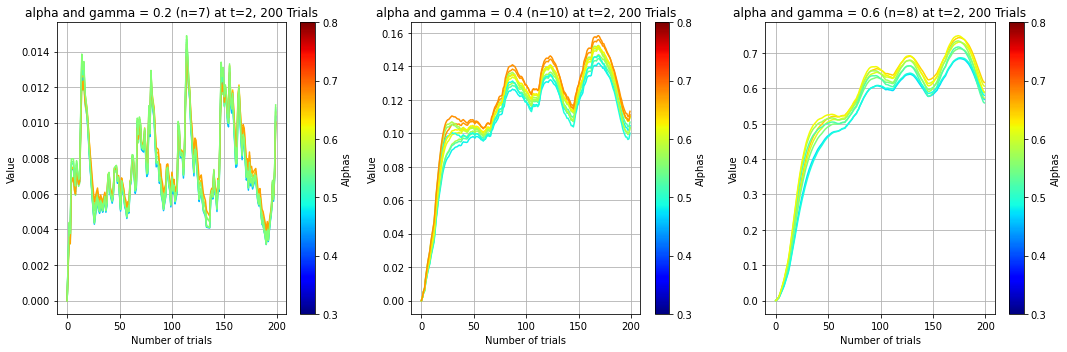

[0.2, 0.4, 0.6]


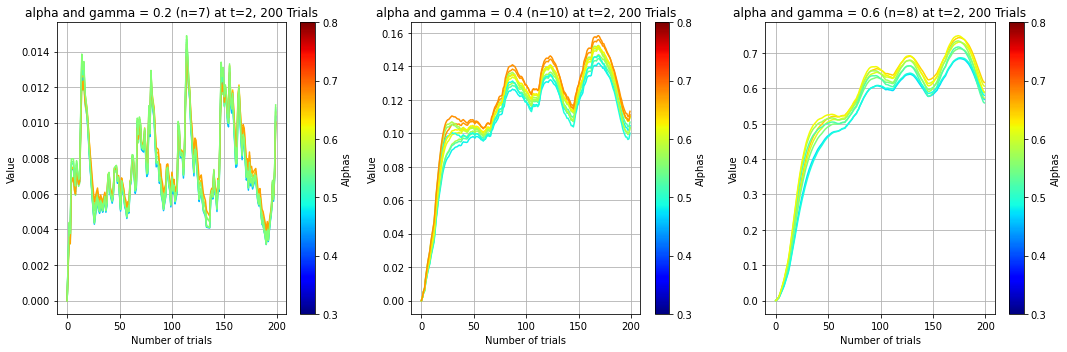

In [22]:
# Both will output the same graph
drl.val_at_t(v, state = 0, 
             time = 2, 
             diversify = ["alpha", (0.3,0.8), "gamma", [0.2, 0.4, 0.6]],
             fname = "var")

drl.val_at_t(var, state = 0, 
             time = 2, 
             diversify = ["alpha", (0.3,0.8), "gamma", [0.2, 0.4, 0.6]],
             fname = "var")

In [ ]:
drl.heatmap(v, state = 0, 
            prs = range(4,6), 
            diversify=["alpha", "gamma"],
            fname="var")

In [ ]:
drl.val_over_t(v, st = 0, stp = 0.5,
                    fname = "var",
                    diversify = ["alpha", (0.3,0.8), "gamma", [0.2, 0.4, 0.6]])

<h3>Delay Task</h3>

In [ ]:
n_trials = 200
t_int = 8 # length of trial
dt = 0.5 # timestep size
tsk = "delay"

types = 6
t_stim = torch.full((types,), 1)
t_rew = torch.tensor([2.25, 3.5, 5, 7.5, 2, 2])
s_rew = torch.tensor([3, 3, 3, 3, 0.5, (1/6)])
n_predictors = 20 # number of value predictors

# Advanced Parameters
unc = 0

#Initialize experiment set-up (time intervals, rewards, etc.)
T, x, r = drl.init(tsk = tsk,
                   n_trials = n_trials, 
                   t_int = t_int, 
                   delta = dt, 
                   types = types,
                   t_stim = t_stim,
                   t_rew = t_rew,
                   s_rew = s_rew,
                   uncertainty = unc)

In [ ]:
#Simulate experiment with given parameters
exp = drl.sim(T, x, r, 
                tsk = tsk,
                num_predictors = n_predictors,
                a = (0.3, 0.8),
                g = [0.3,0.6,0.8],
                l = 0.2,
                fname = "delay")

In [ ]:
drl.val_at_t(exp, state = 0, 
             time = 2, 
             diversify = ["alpha", (0.3,0.8), "gamma", [0.2, 0.4, 0.6]],
             fname = "delay")

In [ ]:
drl.heatmap(v, state = 0, 
            prs = range(4,6), 
            diversify=["alpha", "gamma"],
            fname="delay")

In [ ]:
drl.val_over_t(v, st = 0, stp = 0.5,
                    fname = "var",
                    diversify = ["alpha", (0.3,0.8), "gamma", [0.2, 0.4, 0.6]])